In [1]:
import astropy.units as u
import numpy as np
from dysh.fits import GBTFITSLoad
from dysh.plot.specplot import SpectrumPlot
from copy import deepcopy
import dysh.util as util

### A simple regression test that each new plot is showing what's expected. 
Check is to 1 part in 1E8

In [2]:
def check_spectral_axis(sp,start,end):
    x = sp._plotter._axis.get_xlim()
    #print(x)
    t = np.isclose(x,[start,end],rtol=1E-8)
    if not np.all(t):
        raise Exception(f"start or end value doesn't match spectral axis:{x} Match? {t}") 
    #if x[0] == start and x[-1] == end:
    #    print("OK")
    #else:
    #    raise Exception(f'{x[0]} != {start} or {x[-1]} != {end}')     

### Load the test data.

In [3]:
data_path=util.get_project_testdata() / 'TGBT21A_501_11/TGBT21A_501_11.raw.vegas.fits'

In [4]:
sdf = GBTFITSLoad(data_path)

###  The NoVelocityWarning from astropy is expected

In [5]:
ps = sdf.getps(152)
sp = ps[0].timeaverage()

### This plot should have x-axis as Topocentric $\nu_{opt}$ in Hz
This is the default for this spectrum.

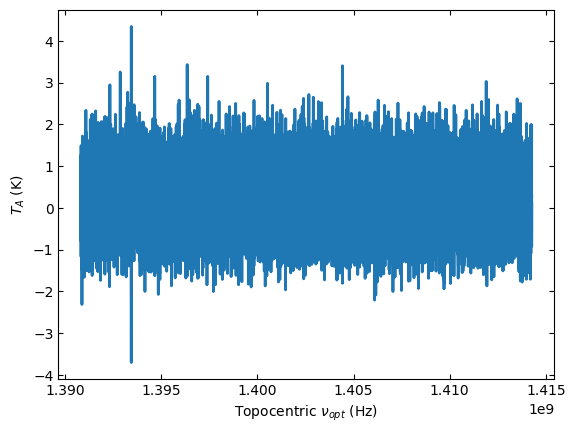

In [6]:
sp.plot()

In [7]:
check_spectral_axis(sp,1389655062.8, 1415435526.0)

### Change the displayed spectral frame to ICRS and display in km/s
The x-axis should be Barycentric $V_{opt}$ in km/s.

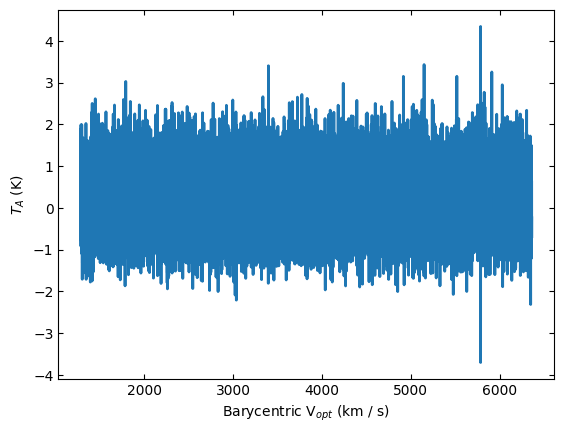

In [8]:
sp.plot(xaxis_unit='km/s',vel_frame='icrs')

In [9]:
check_spectral_axis(sp,1032.97177,6613.7947)

### Heliocentric optical frequency in GHZ

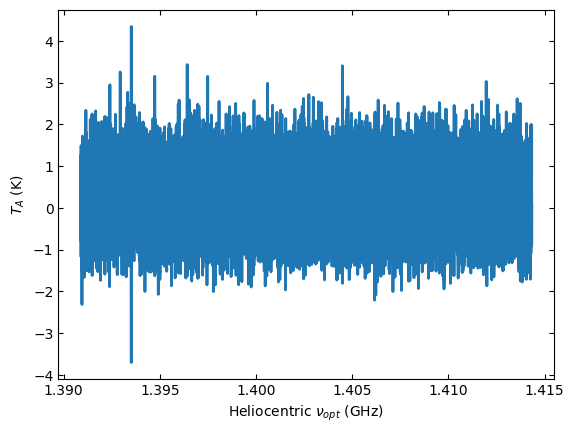

In [10]:
sp.plot(xaxis_unit="GHz", vel_frame='hcrs')

In [11]:
check_spectral_axis(sp,1.389725776,1.41550755)

### Topocentric optical velocity in km/s

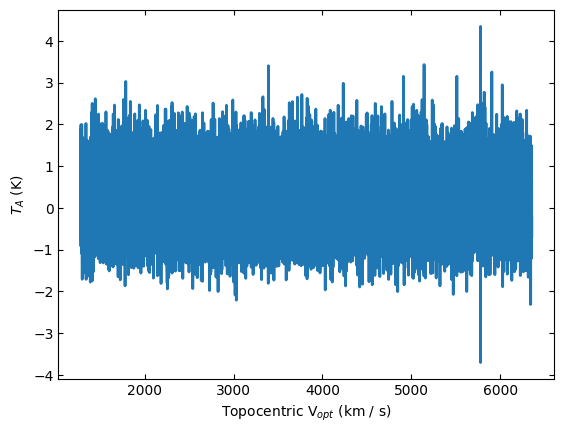

In [12]:
sp.plot(xaxis_unit='km/s',vel_frame="topocentric")

### Galactocentric optical velocity in parcec per megayear :-)

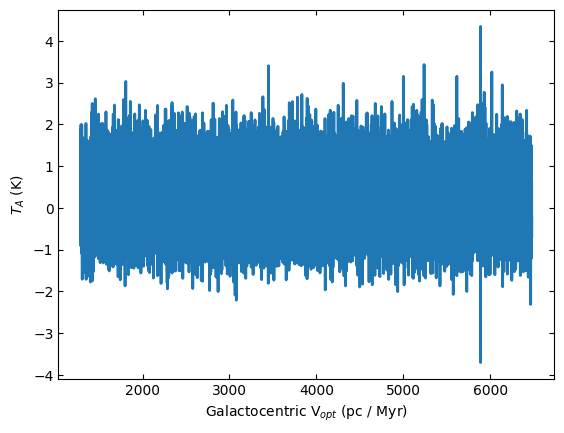

In [13]:
sp.plot(xaxis_unit="pc/Myr", vel_frame='galactocentric')

In [14]:
check_spectral_axis(sp,1031.03975,6738.1442)

### Heliocentric velocity, now using radio convention

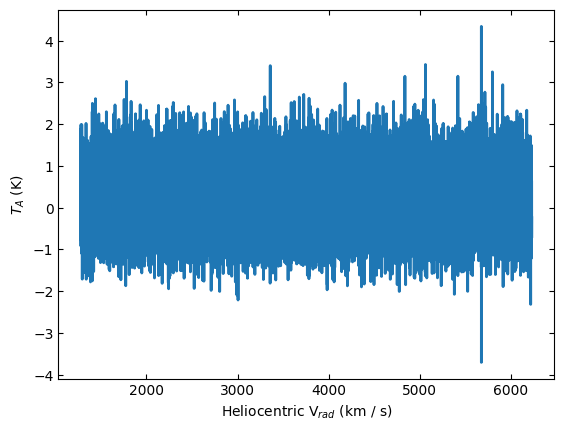

In [15]:
sp.plot(xaxis_unit="km/s", vel_frame='hcrs', doppler_convention='radio')

In [16]:
check_spectral_axis(sp,1033.81962,6475.35047)

### Heliocentric velocity, optical  convention

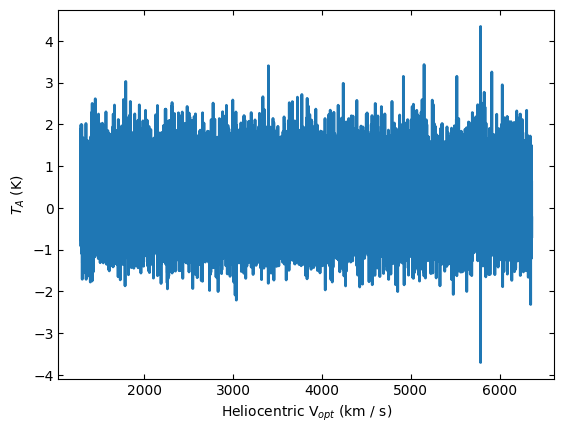

In [17]:
sp.plot(xaxis_unit="km/s", vel_frame='hcrs', doppler_convention='optical')

### Heliocentric velocity, relativistic convention

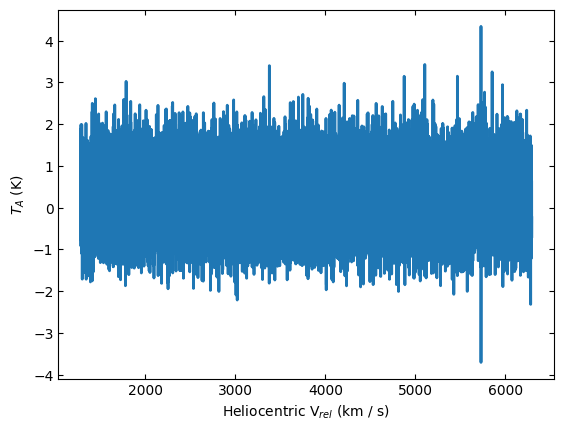

In [18]:
sp.plot(xaxis_unit="km/s", vel_frame='hcrs', doppler_convention='relativistic')

In [19]:
check_spectral_axis(sp,1033.46013,6543.12478)